# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [52]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
# To install citipy, open new cell and run (pip install citipy)
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [53]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
# np.random.uniform() function the size=1500 argument specifies the number of random values to generate.
# zip() function is used to combine the generated latitude and longitude values into pairs.
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
# citipy.nearest_city() function to find the nearest city based on the given latitude and longitude
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [54]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        # Explain the append method 
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint-francois
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | ceeldheer
Processing Record 6 of Set 1 | pombas
Processing Record 7 of Set 1 | stanley
Processing Record 8 of Set 1 | al bayda'
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | kalispell
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | shache
Processing Record 16 of Set 1 | nabire
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | ust-nera
Processing Record 19 of Set 1 | longyearbyen
Processing Record 20 of Set 1 | nouadhibou
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Set 1 | vi

Processing Record 36 of Set 4 | hasaki
Processing Record 37 of Set 4 | luanda
Processing Record 38 of Set 4 | aroma
Processing Record 39 of Set 4 | kingston
Processing Record 40 of Set 4 | ejido benito juarez
City not found. Skipping...
Processing Record 41 of Set 4 | saynshand
Processing Record 42 of Set 4 | college
Processing Record 43 of Set 4 | buguias
Processing Record 44 of Set 4 | tofol
Processing Record 45 of Set 4 | mayahi
Processing Record 46 of Set 4 | minas de marcona
Processing Record 47 of Set 4 | xinguara
City not found. Skipping...
Processing Record 48 of Set 4 | carnarvon
Processing Record 49 of Set 4 | smithers
Processing Record 0 of Set 5 | latakia
Processing Record 1 of Set 5 | leua
Processing Record 2 of Set 5 | kiruna
Processing Record 3 of Set 5 | la quiaca
Processing Record 4 of Set 5 | kodiak
Processing Record 5 of Set 5 | afaahiti
Processing Record 6 of Set 5 | mejit
Processing Record 7 of Set 5 | kutoarjo
Processing Record 8 of Set 5 | rongelap
Processing Rec

Processing Record 27 of Set 8 | mahina
Processing Record 28 of Set 8 | worpswede
Processing Record 29 of Set 8 | kandukur
Processing Record 30 of Set 8 | piacabucu
Processing Record 31 of Set 8 | ola
Processing Record 32 of Set 8 | salalah
Processing Record 33 of Set 8 | freetown
Processing Record 34 of Set 8 | chegdomyn
Processing Record 35 of Set 8 | pibor
City not found. Skipping...
Processing Record 36 of Set 8 | vihari
Processing Record 37 of Set 8 | northam
Processing Record 38 of Set 8 | choma
Processing Record 39 of Set 8 | sault ste. marie
Processing Record 40 of Set 8 | porto murtinho
Processing Record 41 of Set 8 | callao
Processing Record 42 of Set 8 | cargados carajos
City not found. Skipping...
Processing Record 43 of Set 8 | mount gambier
Processing Record 44 of Set 8 | nikolayevsk-on-amure
Processing Record 45 of Set 8 | brookings
Processing Record 46 of Set 8 | hadibu
Processing Record 47 of Set 8 | new norfolk
Processing Record 48 of Set 8 | kharp
Processing Record 49

Processing Record 16 of Set 12 | faranah
Processing Record 17 of Set 12 | egilsstadir
Processing Record 18 of Set 12 | tolanaro
Processing Record 19 of Set 12 | tongouson
Processing Record 20 of Set 12 | dartmouth
Processing Record 21 of Set 12 | karema
Processing Record 22 of Set 12 | zag
Processing Record 23 of Set 12 | kovaci
Processing Record 24 of Set 12 | kailua-kona
Processing Record 25 of Set 12 | sovetskiy
Processing Record 26 of Set 12 | papao
Processing Record 27 of Set 12 | kolpashevo
Processing Record 28 of Set 12 | le port
Processing Record 29 of Set 12 | zelenoborskiy
Processing Record 30 of Set 12 | gao
Processing Record 31 of Set 12 | cooma
Processing Record 32 of Set 12 | saudarkrokur
Processing Record 33 of Set 12 | koprivnica
Processing Record 34 of Set 12 | surab
Processing Record 35 of Set 12 | saint-paul
Processing Record 36 of Set 12 | canutama
Processing Record 37 of Set 12 | revda
Processing Record 38 of Set 12 | tshabong
Processing Record 39 of Set 12 | cedei

In [56]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [57]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saint-francois,46.4154,3.9054,25.69,47,0,4.12,FR,1688486466
1,adamstown,-25.0660,-130.1015,20.73,66,84,4.54,PN,1688486467
2,puerto natales,-51.7236,-72.4875,4.25,60,40,2.06,CL,1688486437
3,punta arenas,-53.1500,-70.9167,0.06,80,0,1.03,CL,1688486246
4,ceeldheer,3.8488,47.1806,25.44,78,15,10.79,SO,1688486469


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ust-nera,64.5667,143.2000,22.33,58,11,3.48,RU,1688389792
1,port-aux-francais,-49.3500,70.2167,5.01,80,12,12.51,TF,1688389792
2,ust'-ordynskiy,52.8050,104.7508,15.65,90,100,2.40,RU,1688389793
3,qianzhou,28.3167,109.7167,28.07,82,100,1.30,CN,1688389793
4,qaqortoq,60.7167,-46.0333,6.18,71,100,2.31,GL,1688389794


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

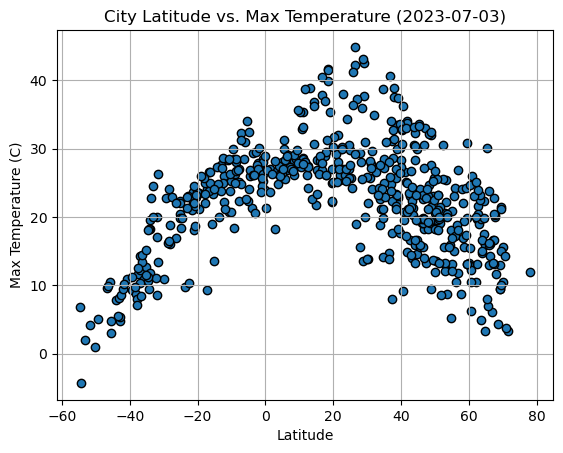

In [14]:
# Build scatter plot for latitude vs. temperature
x = city_data_df["Lat"]
y = city_data_df["Max Temp"]
plt.scatter(x,y, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-07-03)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

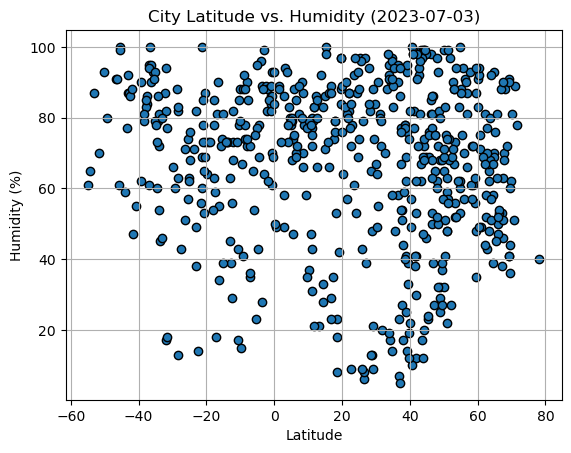

In [15]:
# Build scatter plot for latitude vs. temperature
x = city_data_df["Lat"]
y = city_data_df["Humidity"]
plt.scatter(x,y, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-07-03)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

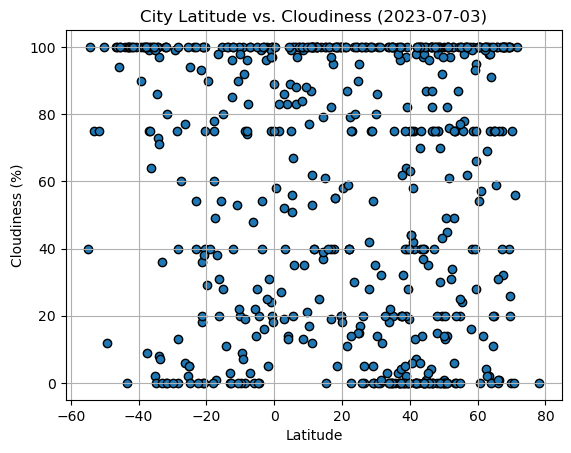

In [16]:
# Build scatter plot for latitude vs. temperature
x = city_data_df["Lat"]
y = city_data_df["Cloudiness"]
plt.scatter(x,y, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-07-03)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

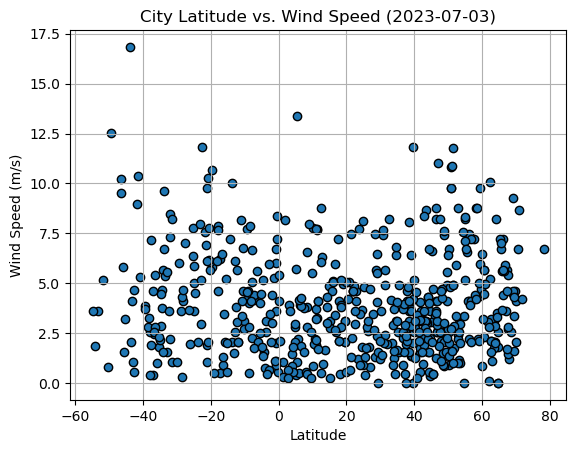

In [17]:
# Build scatter plot for latitude vs. temperature
x = city_data_df["Lat"]
y = city_data_df["Wind Speed"]
plt.scatter(x,y, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-07-03)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [32]:
# Define a function to create Linear Regression plots
def linear_plot(x,y,x_coord,y_coord,y_label):
    # linregress() function from the scipy.stats module to perform linear regression on the x and y data.
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    # slope * x + intercept: Calculates the y-values for the regression line 
    line = slope*x+intercept
    print(f"The r-value is: {r_value**2}")
    equation = 'y={:.2f}x+{:.2f}'.format(slope,intercept)
    plt.scatter(x,y)
    plt.annotate(equation, (x_coord, y_coord),color="red", fontsize=16)
    plt.plot(x, line, color="red")

    # Incorporate the other graph properties
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# .loc[] filters to select rows from city_data_df where value in the "Lat" column is greater than or equal to 0.
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ust-nera,64.5667,143.2000,22.33,58,11,3.48,RU,1688389792
2,ust'-ordynskiy,52.8050,104.7508,15.65,90,100,2.40,RU,1688389793
3,qianzhou,28.3167,109.7167,28.07,82,100,1.30,CN,1688389793
4,qaqortoq,60.7167,-46.0333,6.18,71,100,2.31,GL,1688389794
7,saipan,15.1355,145.7010,28.39,100,0,3.09,MP,1688389795


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# .loc[] filters to select rows from city_data_df where value in the "Lat" column is less than 0.
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,5.01,80,12,12.51,TF,1688389792
5,queenstown,-31.8976,26.8753,20.06,17,0,8.45,ZA,1688389794
6,kruisfontein,-34.0033,24.7314,18.27,54,8,5.68,ZA,1688389794
9,punta arenas,-53.1500,-70.9167,2.06,87,75,3.60,CL,1688389796
10,luganville,-15.5333,167.1667,23.41,74,100,5.20,VU,1688389796


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.35165551561013086


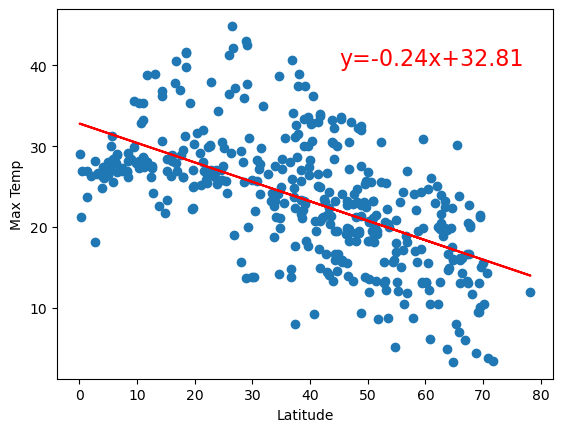

In [33]:
# Linear regression on Northern Hemisphere

# Build scatter plot for latitude vs. temperature
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
# format to add line in empty space
x_coord = 45
y_coord = 40
linear_plot(x,y,x_coord,y_coord,y.name)

The r-value is: 0.7488157718074053


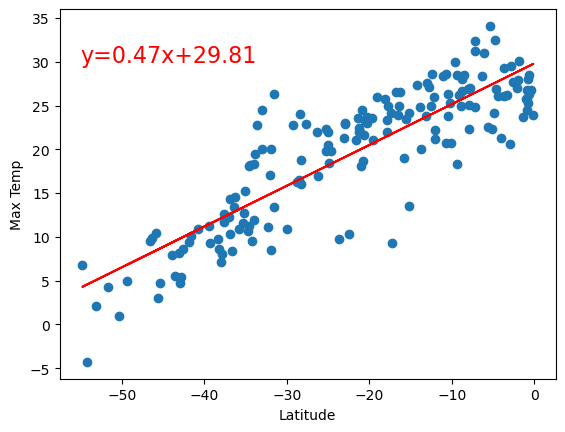

In [44]:
# Linear regression on Southern Hemisphere

# Build scatter plot for latitude vs. temperature
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
# format to add line in empty space
x_coord = -55
y_coord = 30
linear_plot(x,y,x_coord,y_coord,y.name)

**Discussion about the linear relationship:** 

- Northern Hemisphere: 
The r-value of 0.35165551561013086 suggests a weak positive correlation between the variables being analyzed.

- Southern Hemisphere: 
The r-value of 0.7488157718074053 indicates a strong positive correlation between the variables being analyzed and in general, an r-value between 0.7 and 1.0 is considered a strong positive correlation. A strong positive correlation indicates that as one variable increases, the other variable tends to increase as well.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.005239994816439654


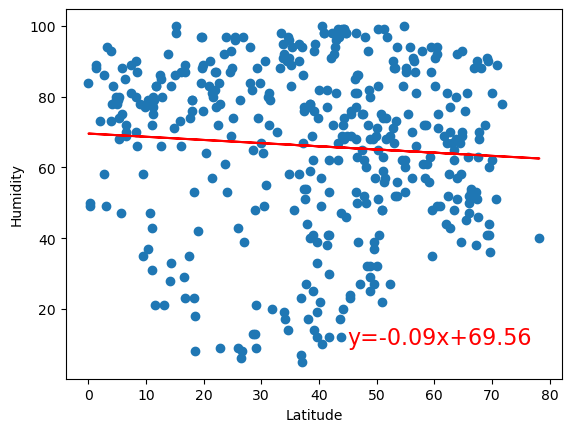

In [35]:
# Linear regression on Northern Hemisphere

# Build scatter plot for latitude vs. Humidity
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
# format to add line in empty space
x_coord = 45
y_coord = 10
linear_plot(x,y,x_coord,y_coord,y.name)

The r-value is: 0.014778980217303988


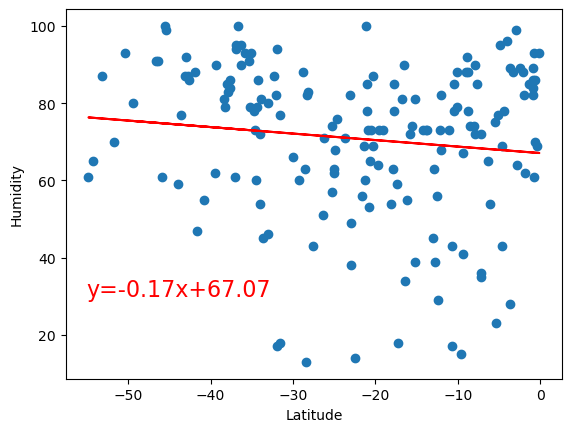

In [47]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
# format to add line in empty space
x_coord = -55
y_coord = 30
linear_plot(x,y,x_coord,y_coord,y.name)

**Discussion about the linear relationship:** 
- Northern Hemisphere: The r-value of 0.005239994816439654, suggests a very weak positive correlation or almost no correlation.
- Southern Hemisphere: The r-value of 0.014778980217303988 indicates a very weak positive correlation or almost no correlation.
- For both hemispheres, the low r-values near zero indicates that latitude alone does not provide a strong basis for predicting or explaining changes in humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.00253761314657265


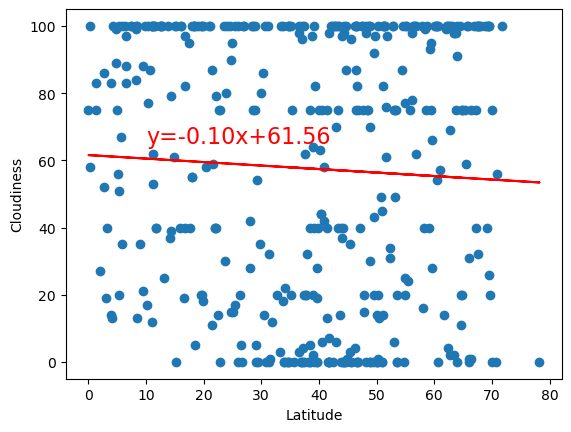

In [38]:
# Linear regression on Northern Hemisphere

# Build scatter plot for latitude vs. Cloudiness
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
# format to add line in empty space
x_coord = 10
y_coord = 65
linear_plot(x,y,x_coord,y_coord,y.name)

The r-value is: 0.045733953380826545


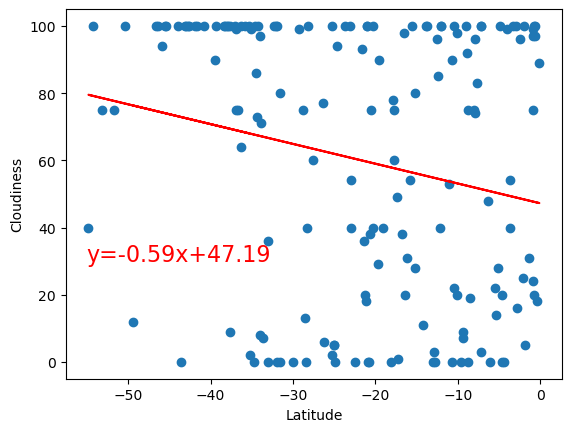

In [48]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
# format to add line in empty space
x_coord = -55
y_coord = 30
linear_plot(x,y,x_coord,y_coord,y.name)

**Discussion about the linear relationship:** 
- Northern Hemisphere: The r-value of 0.00253761314657265 indicates an extremely weak positive correlation or nearly no correlation.
- Southern Hemisphere: The r-value of 0.045733953380826545 indicates a weak positive correlation between cloudiness and latitude in the Southern Hemisphere, even when the correlation is slightly stronger than in the Northern Hemisphere.
- For both hemispheres, the low r-values close to zero suggest that latitude alone is not a strong predictor of cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.017465120739581282


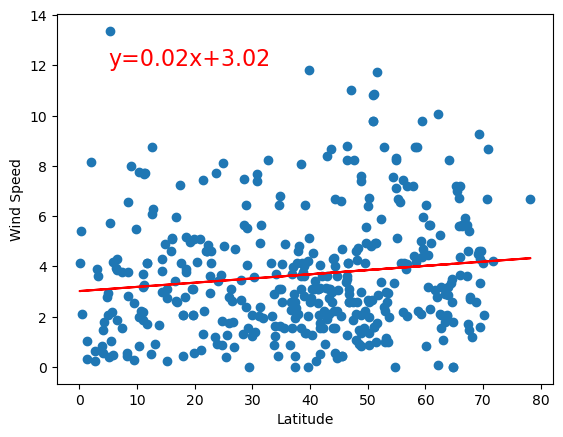

In [41]:
# Linear regression on Northern Hemisphere

# Build scatter plot for latitude vs. Wind Speed
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
# format to add line in empty space
x_coord = 5
y_coord = 12
linear_plot(x,y,x_coord,y_coord,y.name)

The r-value is: 0.01567056762530796


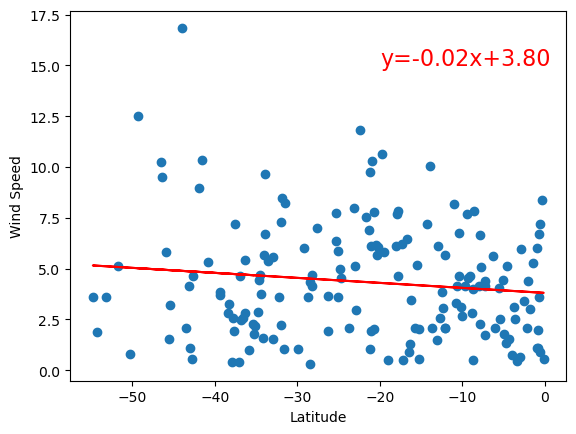

In [51]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
# format to add line in empty space
x_coord = -20
y_coord = 15
linear_plot(x,y,x_coord,y_coord,y.name)

**Discussion about the linear relationship:** 
- Northern Hemisphere: The r-value of 0.017465120739581282 indicates a very weak positive correlation or almost no correlation.
- Southern Hemisphere: The r-value of 0.01567056762530796 suggests a very weak positive correlation or almost no correlation between wind speed and latitude.
- In both hemispheres, the low r-values near zero suggest that latitude alone is not a strong predictor of wind speed. 